In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# preferable only run once
raw_data = pd.read_csv("data/training_set_VU_DM.csv", sep=',')

In [3]:
raw_data.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [4]:
# find all variables where at least half of the data is missing
missing = raw_data.isna().sum()
missing[missing >= len(raw_data)/2]

visitor_hist_starrating      4706481
visitor_hist_adr_usd         4705359
srch_query_affinity_score    4640941
comp1_rate                   4838417
comp1_inv                    4828788
comp1_rate_percent_diff      4863908
comp2_rate                   2933675
comp2_inv                    2828078
comp2_rate_percent_diff      4402109
comp3_rate                   3424059
comp3_inv                    3307357
comp3_rate_percent_diff      4485550
comp4_rate                   4650969
comp4_inv                    4614684
comp4_rate_percent_diff      4827261
comp5_rate                   2735974
comp5_inv                    2598327
comp5_rate_percent_diff      4117248
comp6_rate                   4718190
comp6_inv                    4697371
comp6_rate_percent_diff      4862173
comp7_rate                   4642999
comp7_inv                    4601925
comp7_rate_percent_diff      4819832
comp8_rate                   3041693
comp8_inv                    2970844
comp8_rate_percent_diff      4343617
g

In [5]:
keep_cols = []
for column in raw_data.columns:
    if not raw_data[column].isna().sum() >= len(raw_data) /2:
        keep_cols.append(column)

In [6]:
#create new df with less columns
small_df = raw_data[keep_cols].copy()

In [7]:
small_df

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,booking_bool
0,1,2013-04-04 08:32:15,12,187,219,893,3,3.5,1,2.83,...,1,0,4,0,1,1,NaN,1,0,0
1,1,2013-04-04 08:32:15,12,187,219,10404,4,4.0,1,2.20,...,1,0,4,0,1,1,NaN,1,0,0
2,1,2013-04-04 08:32:15,12,187,219,21315,3,4.5,1,2.20,...,1,0,4,0,1,1,NaN,1,0,0
3,1,2013-04-04 08:32:15,12,187,219,27348,2,4.0,1,2.83,...,1,0,4,0,1,1,NaN,1,0,0
4,1,2013-04-04 08:32:15,12,187,219,29604,4,3.5,1,2.64,...,1,0,4,0,1,1,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,332785,2013-06-30 19:55:18,5,219,219,77700,3,4.0,1,1.61,...,1,21,3,0,1,0,550.92,0,0,0
4958343,332785,2013-06-30 19:55:18,5,219,219,88083,3,4.0,1,1.95,...,1,21,3,0,1,0,553.14,0,0,0
4958344,332785,2013-06-30 19:55:18,5,219,219,94508,3,3.5,1,1.10,...,1,21,3,0,1,0,544.43,0,0,0
4958345,332785,2013-06-30 19:55:18,5,219,219,128360,3,5.0,1,1.95,...,1,21,3,0,1,0,550.38,0,1,1


In [8]:
max(raw_data.srch_id)

332785

<AxesSubplot:xlabel='click_bool', ylabel='position'>

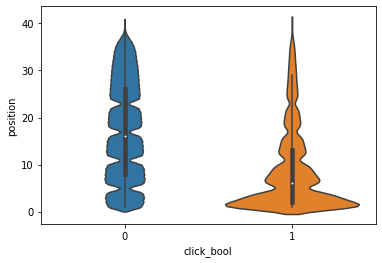

In [9]:
sns.violinplot(y=raw_data.position, x=raw_data.click_bool)

<AxesSubplot:xlabel='position', ylabel='prop_starrating'>

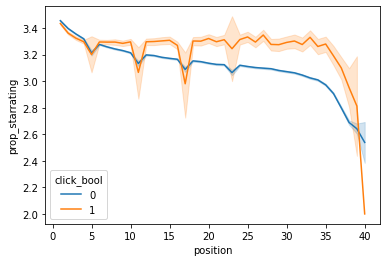

In [10]:
sns.lineplot(x=raw_data.position, y=raw_data.prop_starrating, hue=raw_data.click_bool)

In [11]:
#sns.lineplot(x=raw_data.position, y=raw_data.prop_location_score1, hue=raw_data.srch_id)

<AxesSubplot:>

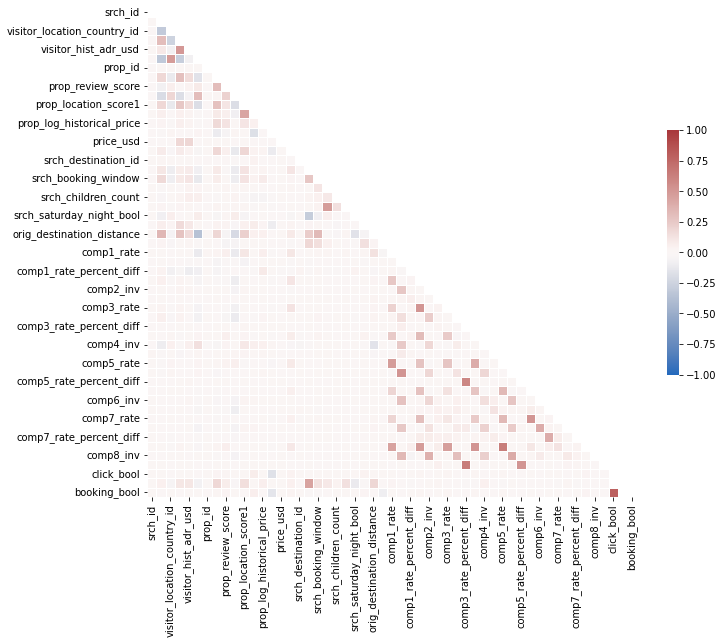

In [12]:
corr = raw_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.color_palette("vlag", as_cmap=True)
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

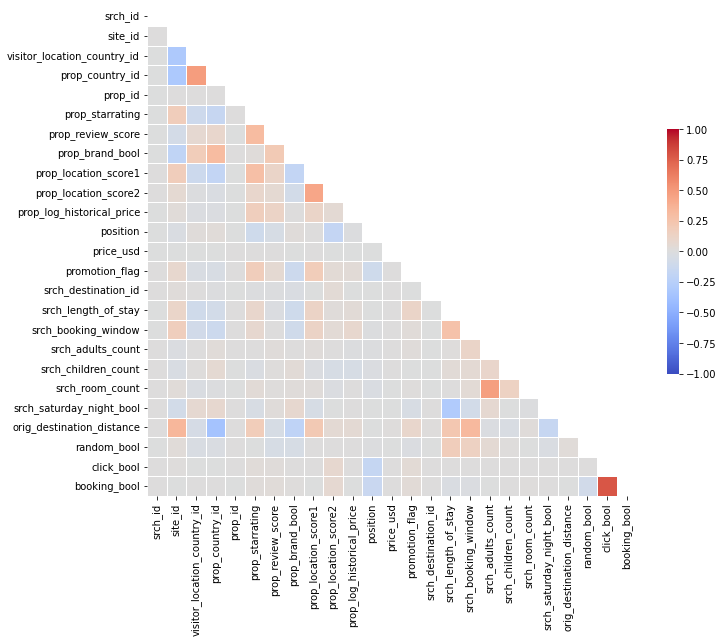

In [13]:
cmap2 = sns.color_palette("coolwarm", as_cmap=True)
corr2 = small_df.corr()
mask2 = np.triu(np.ones_like(corr2, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr2, mask=mask2, cmap=cmap2, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
# find all variables where at least half of the data is missing
missing = small_df.isna().sum()
missing[missing > 0]

prop_review_score               7364
prop_location_score2         1090348
orig_destination_distance    1607782
dtype: int64